In [134]:
import pandas as pd
import numpy as np

In [135]:
df=pd.read_csv('dirty_iris.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NaN,3.6,1.4,0.2,setosa


In [136]:
dropped=df.dropna()
print('Number of complete obs = ',dropped.shape[0])
print('Percentage of complete obs = ',dropped.shape[0]/df.shape[0]*100,'%')

Number of complete obs =  131
Percentage of complete obs =  87.33333333333333 %


In [137]:
df.replace(to_replace=np.nan,value='NA')

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,NA,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [138]:
def ruleset(df):
    df['rule 1']=df['Species'].apply(lambda x: True if x=='setosa' or x==' versicolor' or x=='virginica' else False)
    df['rule 2']=df.apply(lambda x: True if x['Sepal.Length'] > 0 and x['Sepal.Width']>0 and x['Petal.Length']>0 and x['Petal.Width']>0 else False,axis=1)
    df['rule 3']=df.apply(lambda x: True if x['Petal.Length']>= 2*x['Petal.Width'] else False,axis=1)
    df['rule 4']=df['Sepal.Length'].apply(lambda x:True if x<=30 else False)
    df['rule 5']=df.apply(lambda x:True if x['Sepal.Length']>x['Petal.Length'] else False,axis=1)
    return df

In [139]:
df2=ruleset(df)
df2

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,rule 1,rule 2,rule 3,rule 4,rule 5
0,5.1,3.5,1.4,0.2,Setosa,False,True,True,True,True
1,4.9,3.0,1.4,0.2,setosa,True,True,True,True,True
2,4.7,3.2,1.3,0.2,setosa,True,True,True,True,True
3,4.6,3.1,1.5,0.2,setosa,True,True,True,True,True
4,NaN,3.6,1.4,0.2,setosa,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,True,True,True,True,True
146,6.3,2.5,5.0,1.9,virginica,True,True,True,True,True
147,6.5,3.0,5.2,2.0,virginica,True,True,True,True,True
148,6.2,3.4,5.4,2.3,virginica,True,True,True,True,True


In [140]:
df2=df2.iloc[:,5:].astype('int')
df2

,rule 1,rule 2,rule 3,rule 4,rule 5
0,0,1,1,1,1
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,0,1,0,0
...,...,...,...,...,...
145,1,1,1,1,1
146,1,1,1,1,1
147,1,1,1,1,1
148,1,1,1,1,1


In [150]:
broken=df2.shape[0]-df2.sum()
broken

rule 1    53
rule 2    19
rule 3     0
rule 4     8
rule 5     8
dtype: int64

<Axes: >

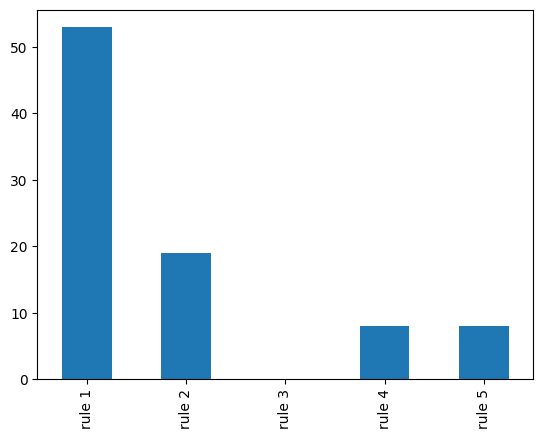

In [151]:
broken.plot(kind='bar')

<Axes: >

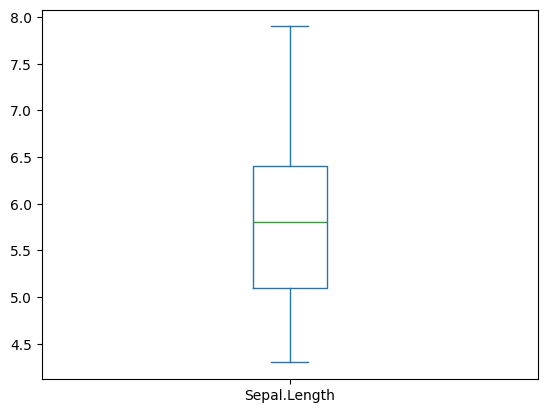

In [152]:
df['Sepal.Length'].plot(kind='box')